<div class = "alert alert-warning">
<b> Goal for TSA detection </b>
    
1. Flag the data points that **deviate from the expected** using statistical properties that represent **measures of central tendency**, such as mean, median and mode.

2. **measures of spread**, such as standard deviation, to find those points with extreme deviation from the mean of a normally distributed continuous variable.

3. Use the simple or exponential moving average to **smooth short-term fluctuations and highlight long-term** ones can help reduce some of the noise and draw out extreme outliers.
</div>



In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# mdates: data form control
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

In [2]:
def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

def plot_and_eval(predictions, actual, metric_fmt='{:.2f}', linewidth=4):
    if type(predictions) is not list:
        predictions = [predictions]

    plt.figure(figsize=(16, 8))
    plt.plot(train,label='Train')
    plt.plot(test, label='Test')

    for yhat in predictions:
        mse, rmse = evaluate(actual, yhat, output=False)        
        label = f'{yhat.name}'
        if len(predictions) > 1:
            label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.plot(yhat, label=label, linewidth=linewidth)

    if len(predictions) == 1:
        label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.title(label)

    plt.legend(loc='best')
    plt.show()    

In [3]:
# after peeking at the original file:
# read text file
# separate by space
# no header
df = pd.read_csv('anonymized-curriculum-access.txt', sep=" ", header=None)

In [5]:
df.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [6]:
# combine the date and time columns separated by space
# before naming columns date was in col 0 & time was in col 1
df['datetime'] = df[[0, 1]].apply(lambda x: ' '.join(x), axis=1)

In [7]:
# now that we've combined the datetime, we can drop the two separate col
df.drop(columns = [0,1], inplace = True)

In [8]:
# re-name columns
# except there are two columns of numbers that i am not sure what they are
df.columns = ["content", "etc1", "etc2", "ip","datetime"]

In [9]:
# convert time elements into standard datetime format
df.datetime = pd.to_datetime(df.datetime)

In [10]:
# set time column as index
df = df.set_index('datetime')

In [11]:
# look at dataframe overview
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 4 columns):
content    399195 non-null object
etc1       399195 non-null int64
etc2       372441 non-null float64
ip         399195 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 15.2+ MB


In [12]:
df.head()

,content,etc1,etc2,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


**Takeaway**
1. date time is now in good format and set as index for TSA
2. not sure the numbers in column etc1 and etc2 means...
3. content is where the page titles are located

In [13]:
# good amount of nulls in etc2
df.isnull().sum()

content        0
etc1           0
etc2       26754
ip             0
dtype: int64

In [14]:
# take a look at the other mysterious col that has zero null
df.etc1.describe()

count    399195.000000
mean        268.794667
std         147.587312
min           1.000000
25%         157.000000
50%         288.000000
75%         392.000000
max         543.000000
Name: etc1, dtype: float64

In [15]:
# value counts vary quite a bit
df.etc1.value_counts()

53     8236
64     8008
11     8004
344    5279
1      4266
314    3233
423    2995
323    2846
354    2821
211    2625
418    2598
127    2563
410    2398
277    2367
347    2318
325    2248
363    2237
433    2217
337    2183
186    2180
274    2136
315    2130
416    2103
368    2063
304    2061
272    2008
197    1993
275    1900
264    1898
269    1894
       ... 
137      10
279      10
84       10
141       9
95        9
388       8
107       8
104       8
401       7
115       6
152       5
399       5
71        5
169       5
82        5
62        4
216       4
85        4
246       4
348       3
177       3
89        3
176       3
81        3
97        2
66        1
461       1
163       1
165       1
212       1
Name: etc1, Length: 543, dtype: int64

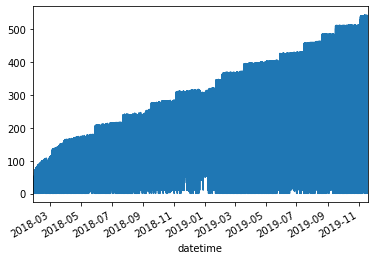

In [21]:
# accumulation of etc1 over time?
# could etc1 be summation of Codeup students?
# could etc1 be the sum of traffic over time?
df.etc1.plot()
plt.show()

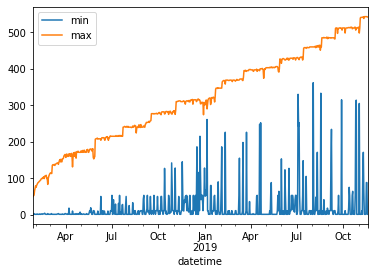

In [23]:
df.etc1.resample("D").min().plot(label="min")
df.etc1.resample("D").max().plot(label="max")
plt.legend()
plt.show()

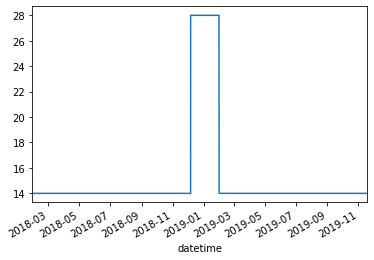

In [16]:
# any relationship between particular subset of etc1 versus etc2?
df [df.etc1 == 53 ].etc2.plot()
plt.show()

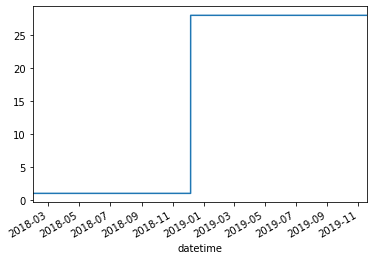

In [17]:
df [df.etc1 == 64 ].etc2.plot()
plt.show()

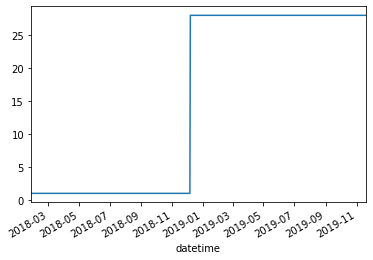

In [18]:
df [df.etc1 == 11].etc2.plot()
plt.show()

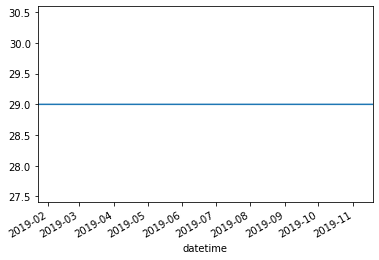

In [19]:
df [df.etc1 == 344 ].etc2.plot()
plt.show()

In [25]:
df.etc2.describe()

count    372441.000000
mean         26.912649
std           7.846146
min           1.000000
25%          23.000000
50%          27.000000
75%          31.000000
max          52.000000
Name: etc2, dtype: float64

In [29]:
# could etc2 be the amount of students in program type?
# or sum of students at Codeup at same time frame?
df.etc2.value_counts()

29.0    35969
24.0    35039
33.0    34433
22.0    28875
23.0    28056
32.0    26801
26.0    26760
25.0    25233
31.0    22665
28.0    20677
27.0    20198
34.0    15519
51.0    10835
14.0     9069
1.0      8877
21.0     7181
17.0     3792
52.0     2896
13.0     2610
8.0      1671
18.0     1603
19.0     1142
16.0      740
15.0      691
7.0       461
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
Name: etc2, dtype: int64

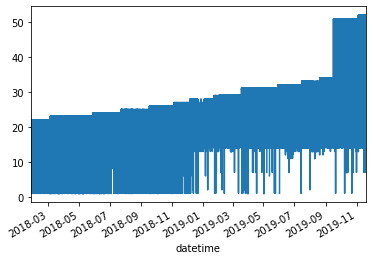

In [26]:
df.etc2.plot()
plt.show()

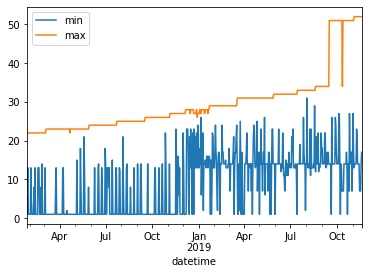

In [27]:
df.etc2.resample("D").min().plot(label="min")
df.etc2.resample("D").max().plot(label="max")
plt.legend()
plt.show()

In [31]:
df [df.etc2 == 29]

,content,etc1,etc2,ip
datetime,,,,
2019-01-22 15:09:54,/,323,29.0,97.105.19.58
2019-01-22 15:10:01,toc,323,29.0,97.105.19.58
2019-01-22 15:11:47,/,324,29.0,97.105.19.58
2019-01-22 15:11:53,toc,323,29.0,97.105.19.58
2019-01-22 15:11:55,/,325,29.0,97.105.19.58
2019-01-22 15:11:55,html-css,323,29.0,97.105.19.58
2019-01-22 15:11:59,/,326,29.0,97.105.19.58
2019-01-22 15:12:00,java-i,325,29.0,97.105.19.58
2019-01-22 15:12:03,java-i/introduction-to-java,325,29.0,97.105.19.58


In [32]:
df [df.etc2 == 24]

,content,etc1,etc2,ip
datetime,,,,
2018-05-29 14:42:38,/,182,24.0,97.105.19.61
2018-05-29 14:42:39,/,183,24.0,97.105.19.61
2018-05-29 14:42:42,/,184,24.0,97.105.19.61
2018-05-29 14:42:42,/,185,24.0,97.105.19.61
2018-05-29 14:42:42,/,186,24.0,97.105.19.61
2018-05-29 14:42:43,/,187,24.0,97.105.19.61
2018-05-29 14:42:44,/,188,24.0,97.105.19.61
2018-05-29 14:42:45,/,189,24.0,97.105.19.61
2018-05-29 14:42:45,/,190,24.0,97.105.19.61


In [33]:
df [df.etc2 == 33]

,content,etc1,etc2,ip
datetime,,,,
2019-07-15 15:39:34,/,433,33.0,97.105.19.58
2019-07-15 15:39:48,toc,433,33.0,97.105.19.58
2019-07-15 15:40:29,quiz,434,33.0,97.105.19.58
2019-07-15 15:40:33,/,434,33.0,97.105.19.58
2019-07-15 15:40:35,javascript-i,433,33.0,97.105.19.58
2019-07-15 15:40:55,spring,433,33.0,97.105.19.58
2019-07-15 15:40:58,java-i,433,33.0,97.105.19.58
2019-07-15 15:41:06,javascript-i,433,33.0,97.105.19.58
2019-07-15 15:41:14,java-iii,433,33.0,97.105.19.58


In [34]:
df [df.etc2 == 22]

,content,etc1,etc2,ip
datetime,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61
2018-01-26 09:58:26,javascript-i/functions,4,22.0,97.105.19.61
2018-01-26 09:59:22,mkdocs/search_index.json,5,22.0,97.105.19.61
2018-01-26 10:00:02,javascript-i/introduction/working-with-data-ty...,6,22.0,97.105.19.61
2018-01-26 10:00:37,/,6,22.0,97.105.19.61


In [35]:
df [df.etc2 == 23]

,content,etc1,etc2,ip
datetime,,,,
2018-03-05 14:22:48,html-css/css-i,25,23.0,97.105.19.61
2018-03-05 14:22:58,html-css/forms,25,23.0,97.105.19.61
2018-03-05 14:23:06,html-css/css-i,25,23.0,97.105.19.61
2018-03-05 14:23:08,html-css/css-i/introduction,25,23.0,97.105.19.61
2018-03-05 14:23:47,html-css,25,23.0,97.105.19.61
2018-03-05 14:23:59,/,25,23.0,97.105.19.61
2018-03-05 14:24:01,html-css,25,23.0,97.105.19.61
2018-03-05 14:24:03,html-css/elements,25,23.0,97.105.19.61
2018-03-05 14:26:43,/,116,23.0,97.105.19.61


In [36]:
df [df.etc2 == 32]

,content,etc1,etc2,ip
datetime,,,,
2019-05-29 09:48:59,/,407,32.0,97.105.19.58
2019-05-29 09:56:08,/,408,32.0,97.105.19.58
2019-05-29 10:01:23,/,409,32.0,97.105.19.58
2019-05-29 10:01:28,/,410,32.0,97.105.19.58
2019-05-29 10:01:31,html-css,409,32.0,97.105.19.58
2019-05-29 10:01:36,/,411,32.0,97.105.19.58
2019-05-29 10:01:43,/,412,32.0,97.105.19.58
2019-05-29 10:01:43,/,413,32.0,97.105.19.58
2019-05-29 10:01:44,/,414,32.0,97.105.19.58


In [37]:
df [df.etc2 == 26]

,content,etc1,etc2,ip
datetime,,,,
2018-09-17 14:12:28,/,259,26.0,97.105.19.58
2018-09-17 14:13:38,/,260,26.0,97.105.19.58
2018-09-17 14:13:42,html-css,260,26.0,97.105.19.58
2018-09-17 14:13:58,/,261,26.0,97.105.19.58
2018-09-17 14:14:21,/,262,26.0,97.105.19.58
2018-09-17 14:14:46,/,263,26.0,97.105.19.58
2018-09-17 14:15:51,/,264,26.0,97.105.19.58
2018-09-17 14:15:57,/,265,26.0,97.105.19.58
2018-09-17 14:16:11,html-css/introduction,260,26.0,97.105.19.58


In [38]:
df [df.etc2 == 25]

,content,etc1,etc2,ip
datetime,,,,
2018-07-23 13:51:26,registerUser,218,25.0,97.105.19.58
2018-07-23 13:51:39,registerUser,218,25.0,97.105.19.58
2018-07-23 15:15:19,/,219,25.0,97.105.19.58
2018-07-23 15:15:20,/,220,25.0,97.105.19.58
2018-07-23 15:15:21,/,221,25.0,97.105.19.58
2018-07-23 15:15:21,/,222,25.0,97.105.19.58
2018-07-23 15:15:24,toc,221,25.0,97.105.19.58
2018-07-23 15:15:26,toc,220,25.0,97.105.19.58
2018-07-23 15:15:27,/,223,25.0,97.105.19.58


In [39]:
df [df.etc2 == 31]

,content,etc1,etc2,ip
datetime,,,,
2019-03-18 16:01:40,assets/js/pdfmake.min.js.map,373,31.0,97.105.19.58
2019-03-18 16:02:00,/,374,31.0,97.105.19.58
2019-03-18 16:02:08,toc,374,31.0,97.105.19.58
2019-03-18 18:53:35,/,376,31.0,173.173.127.101
2019-03-18 18:55:34,toc,376,31.0,173.173.127.101
2019-03-18 18:58:56,html-css,376,31.0,173.173.127.101
2019-03-18 19:05:33,html-css/introduction,376,31.0,173.173.127.101
2019-03-18 19:26:01,html-css/elements,376,31.0,173.173.127.101
2019-03-18 20:17:46,appendix/git/intellij-intro,377,31.0,173.239.232.97


In [40]:
# instructors?
# mix content and datetime across cohorts?
df [df.etc2 == 28]

,content,etc1,etc2,ip
datetime,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,97.105.19.58
2018-12-06 14:25:40,javascript-i,314,28.0,97.105.19.58
2018-12-06 14:25:41,javascript-i/coffee-project,314,28.0,97.105.19.58
2018-12-06 15:31:29,spring,40,28.0,170.248.173.247
2018-12-06 15:31:33,spring/fundamentals/security,40,28.0,170.248.173.247
2018-12-06 15:33:32,appendix/further-reading/spring/authorization,40,28.0,170.248.173.247
2018-12-06 15:34:29,spring/fundamentals/security/authentication,40,28.0,170.248.173.247
2018-12-06 15:38:58,appendix/further-reading/spring/authorization,40,28.0,170.248.173.247
2018-12-06 15:39:55,appendix/further-reading/spring/security-use-c...,40,28.0,170.248.173.247


In [41]:
df [df.etc2 == 27]

,content,etc1,etc2,ip
datetime,,,,
2018-11-05 14:03:58,/,287,27.0,97.105.19.58
2018-11-05 14:04:58,/,288,27.0,97.105.19.58
2018-11-05 14:05:18,/,289,27.0,97.105.19.58
2018-11-05 14:06:41,/,290,27.0,97.105.19.58
2018-11-05 14:06:51,/,291,27.0,97.105.19.58
2018-11-05 14:06:54,toc,290,27.0,97.105.19.58
2018-11-05 14:07:02,toc,291,27.0,97.105.19.58
2018-11-05 14:07:14,html-css,291,27.0,97.105.19.58
2018-11-05 14:07:20,/,292,27.0,97.105.19.58


In [42]:
# IS THIS US!!!!?????
# started from Aug 20, 2019 & all contents are DS?
df [df.etc2 == 34]

,content,etc1,etc2,ip
datetime,,,,
2019-08-20 09:39:58,/,466,34.0,97.105.19.58
2019-08-20 09:39:59,/,467,34.0,97.105.19.58
2019-08-20 09:39:59,/,468,34.0,97.105.19.58
2019-08-20 09:40:02,/,469,34.0,97.105.19.58
2019-08-20 09:40:08,/,470,34.0,97.105.19.58
2019-08-20 09:40:15,/,471,34.0,97.105.19.58
2019-08-20 09:40:15,/,472,34.0,97.105.19.58
2019-08-20 09:40:17,/,473,34.0,97.105.19.58
2019-08-20 09:40:18,/,474,34.0,97.105.19.58


In [46]:
len(df [df.etc2 == 28 ].etc1.value_counts())

19

In [45]:
len(df [df.etc2 == 34 ].etc1.value_counts())

22

In [50]:
df[df.etc2 == 34].etc1.value_counts()

479    1343
475    1316
476    1101
484    1047
482     949
485     947
478     896
473     815
471     759
469     753
466     707
481     683
472     582
358     570
483     538
468     524
480     518
474     414
470     413
467     361
477     266
487      17
Name: etc1, dtype: int64

In [51]:
df [df.etc1 == 479 ].head(10)

,content,etc1,etc2,ip
datetime,,,,
2019-08-20 09:40:40,/,479,34.0,97.105.19.58
2019-08-20 09:40:50,appendix/cli-git-overview,479,34.0,97.105.19.58
2019-08-20 09:42:44,/,479,34.0,97.105.19.58
2019-08-20 10:46:56,1-fundamentals/1.1-intro-to-data-science,479,34.0,97.105.19.58
2019-08-20 10:46:56,1-fundamentals/modern-data-scientist.jpg,479,34.0,97.105.19.58
2019-08-20 10:46:56,1-fundamentals/AI-ML-DL-timeline.jpg,479,34.0,97.105.19.58
2019-08-20 15:03:35,1-fundamentals/1.2-data-science-pipeline,479,34.0,97.105.19.58
2019-08-20 15:03:35,1-fundamentals/DataToAction_v2.jpg,479,34.0,97.105.19.58
2019-08-20 15:04:17,1-fundamentals/1.3-pipeline-demo,479,34.0,97.105.19.58


In [52]:
df [df.etc1 == 475 ].head(10)

,content,etc1,etc2,ip
datetime,,,,
2019-08-20 09:40:19,/,475,34.0,97.105.19.58
2019-08-20 10:46:35,1-fundamentals/1.1-intro-to-data-science,475,34.0,97.105.19.58
2019-08-20 10:46:36,1-fundamentals/modern-data-scientist.jpg,475,34.0,97.105.19.58
2019-08-20 10:46:36,1-fundamentals/AI-ML-DL-timeline.jpg,475,34.0,97.105.19.58
2019-08-20 10:50:11,1-fundamentals/1.1-intro-to-data-science,475,34.0,97.105.19.58
2019-08-20 10:50:12,1-fundamentals/modern-data-scientist.jpg,475,34.0,97.105.19.58
2019-08-20 10:50:12,1-fundamentals/AI-ML-DL-timeline.jpg,475,34.0,97.105.19.58
2019-08-21 09:20:11,/,475,34.0,97.105.19.58
2019-08-21 09:20:52,1-fundamentals/1.1-intro-to-data-science,475,34.0,97.105.19.58


In [53]:
df[df.etc2 == 34].ip.value_counts()

97.105.19.58       12070
70.226.109.182       394
70.117.31.136        343
67.10.174.4          232
71.78.109.210        216
65.43.118.72         180
67.11.115.125        164
75.1.166.163         163
192.171.117.210      162
136.50.49.145        161
172.124.64.127       155
172.8.173.224        117
76.211.181.33        116
67.11.138.10         105
172.14.106.31         91
66.69.81.250          90
67.11.120.157         85
99.158.246.101        70
12.197.196.242        62
108.174.80.231        50
70.226.110.58         47
99.98.32.97           34
136.50.54.2           31
67.78.73.114          29
216.110.79.11         28
67.11.82.11           23
99.158.247.1          19
12.247.3.50           15
71.42.196.114         15
96.8.130.165          15
                   ...  
67.48.59.123           3
172.58.103.191         3
107.77.222.219         3
166.251.109.240        3
166.251.109.196        3
107.77.222.99          3
107.77.221.19          2
173.173.105.24         2
12.97.187.15           2


In [62]:
a = df['2019-08-20':'2019-11-19']

In [64]:
a[a.etc2 == 34]

,content,etc1,etc2,ip
datetime,,,,
2019-08-20 09:39:58,/,466,34.0,97.105.19.58
2019-08-20 09:39:59,/,467,34.0,97.105.19.58
2019-08-20 09:39:59,/,468,34.0,97.105.19.58
2019-08-20 09:40:02,/,469,34.0,97.105.19.58
2019-08-20 09:40:08,/,470,34.0,97.105.19.58
2019-08-20 09:40:15,/,471,34.0,97.105.19.58
2019-08-20 09:40:15,/,472,34.0,97.105.19.58
2019-08-20 09:40:17,/,473,34.0,97.105.19.58
2019-08-20 09:40:18,/,474,34.0,97.105.19.58


**Takeaway** 
1. etc2 might be cohort identifier > etc2 == 34 might be DS-Bayes 
2. etc1 might be student identifier/ student id

In [54]:
df.content.value_counts(dropna = False)

/                                                                            20564
javascript-i                                                                  8140
search/search_index.json                                                      7005
toc                                                                           6679
html-css                                                                      6143
java-iii                                                                      6003
spring                                                                        5761
jquery                                                                        5501
java-ii                                                                       5386
mysql                                                                         5103
java-i                                                                        5039
javascript-ii                                                                 5024
mysq

In [19]:
df[['content_major','content_sub']] = (df.content.apply(lambda x: pd.Series(str(x).split("/",1))))

In [20]:
df.content_major.isna().sum()

0

In [21]:
df.content_major.str.isspace().mean()

0.0

In [22]:
df.content_sub.isna().sum()

84984

In [23]:
df.content_sub.str.isspace()

datetime
2018-01-26 09:55:03    False
2018-01-26 09:56:02      NaN
2018-01-26 09:56:05    False
2018-01-26 09:56:06    False
2018-01-26 09:56:24    False
2018-01-26 09:56:41    False
2018-01-26 09:56:46    False
2018-01-26 09:56:48    False
2018-01-26 09:56:59    False
2018-01-26 09:58:26    False
2018-01-26 09:59:22    False
2018-01-26 10:00:02    False
2018-01-26 10:00:37    False
2018-01-26 10:00:39      NaN
2018-01-26 10:00:44    False
2018-01-26 10:00:49    False
2018-01-26 10:00:57    False
2018-01-26 10:01:12    False
2018-01-26 10:02:02    False
2018-01-26 10:02:21    False
2018-01-26 10:02:42    False
2018-01-26 10:05:26    False
2018-01-26 10:05:36    False
2018-01-26 10:08:22    False
2018-01-26 10:08:34    False
2018-01-26 10:08:45    False
2018-01-26 10:08:55    False
2018-01-26 10:09:15    False
2018-01-26 10:09:24    False
2018-01-26 10:10:16    False
                       ...  
2019-11-19 10:00:27      NaN
2019-11-19 10:00:29    False
2019-11-19 10:00:33    False
2019-

In [24]:
df.content_major.value_counts(dropna = False, sort = True)

javascript-i                  55152
html-css                      40885
mysql                         39823
jquery                        29903
spring                        28620
java-iii                      25938
java-ii                       23882
                              20564
javascript-ii                 20343
java-i                        19283
appendix                      13760
content                        7805
examples                       7353
search                         7007
slides                         6872
toc                            6679
1-fundamentals                 3120
4-python                       2798
6-regression                   2588
3-sql                          2348
mkdocs                         1909
5-stats                        1855
7-classification               1536
8-clustering                   1163
index.html                     1155
2-storytelling                  944
web-design                      826
9-timeseries                

In [25]:
df.content_sub.value_counts(dropna = False)

NaN                                                             84984
                                                                20564
search_index.json                                                8914
introduction                                                     8215
arrays                                                           5556
functions                                                        5180
tables                                                           3692
elements                                                         3645
javascript-with-html                                             3452
databases                                                        3439
introduction/working-with-data-types-operators-and-variables     3326
loops                                                            3300
servlets                                                         3282
users                                                            3231
css-ii/bootstrap-int

In [26]:
df.ip.value_counts()

97.105.19.58       227220
97.105.19.61        61662
192.171.117.210      8127
70.122.40.62         1338
66.69.108.117        1199
173.174.211.206      1019
108.65.244.91        1007
170.248.173.245       997
67.11.157.190         972
66.69.62.219          934
70.118.8.243          876
72.181.104.64         865
170.248.173.247       828
216.1.153.162         823
67.11.215.97          818
76.185.131.226        793
173.173.113.51        779
67.11.239.2           777
99.61.24.168          765
67.10.174.56          739
72.181.98.75          681
45.23.250.16          663
67.10.161.55          651
136.50.18.71          631
76.204.31.63          618
4.16.216.161          610
72.181.110.80         607
170.248.173.246       590
67.10.166.10          578
70.121.163.5          577
                    ...  
71.42.105.183           1
136.49.24.186           1
173.239.232.163         1
107.77.221.97           1
24.28.154.168           1
73.166.220.146          1
196.52.2.59             1
99.203.155.1

In [ ]:
#df.ip.value_counts().plot(kind='bar')

In [ ]:
#sns.countplot(df['ip'], color='gray')


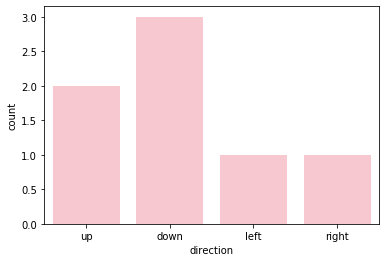

In [33]:
#df = pd.DataFrame({'colour': ['red', 'blue', 'green', 'red', 'red', 'yellow', 'blue'],
                   'direction': ['up', 'up', 'down', 'left', 'right', 'down', 'down']})
#sns.countplot(df['colour'], color='gray')
#sns.countplot(df['direction'], color = 'pink')

In [ ]:
df.columns

In [ ]:
#sns.countplot(df['ip'], color = 'pink')

In [ ]:
df.ip = df.ip.astype('category')

In [ ]:
df.groupby('ip')['ip'].value_counts()

In [ ]:
df.groupby('content')['ip'].value_counts()

In [ ]:
df.info()

In [ ]:
#plt.hist(df.ip, bins = 50, alpha=0.5, label='IP distribution')

In [ ]:
# sns.countplot(y="ip", data=df, color="c")

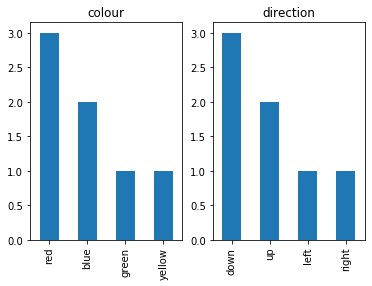

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_features = ["colour", "direction"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [46]:
my_datetime_fmt = mdates.DateFormatter('%m-%d %H:%T')

df_ts_size = df['ip'].resample('30T').max()

idx = pd.date_range(
    df_ts_size.sort_index().index.min(), 
    df_ts_size.sort_index().index.max(),
    freq='30min'
)

df_ts_size = df_ts_size.reindex(idx, fill_value=0).fillna(value=0)

In [50]:
df.head()

,content,etc1,etc2,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [52]:
start_date_train = df_ts_size.head(1).index[0]
end_date_train = '2019-06-26 23:30:00'
start_date_test = '2019-06-27 00:00:00'

train = df_ts_size[:end_date_train]
test = df_ts_size[start_date_test:]

In [57]:
train = train[train != 0]
test = test[test != 0]

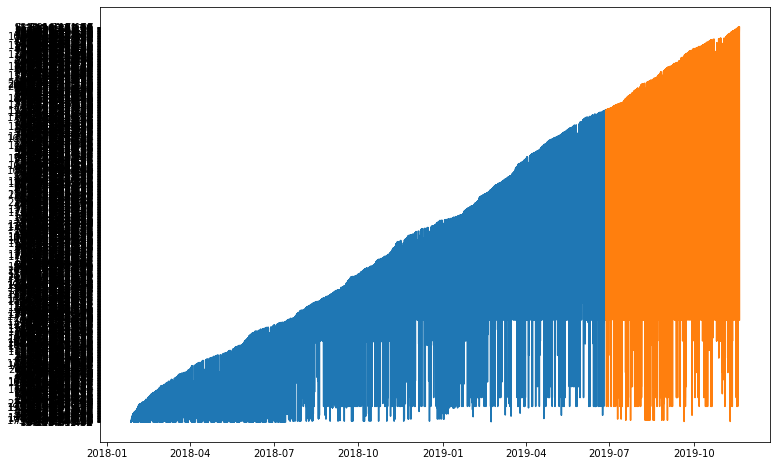

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test)
plt.show()

In [60]:
# Calculating the short-window simple moving average
short_rolling = train.rolling(window=12).mean()

# Calculating the long-window simple moving average
long_rolling = train.rolling(window=24).mean()

TypeError: cannot handle this type -> object